## Preprocessing and Exploration:

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Now, let's load the data into python as a pandas DataFrame and print its info along with a few rows to get a feel for the data**

In [121]:
df = pd.read_excel("Supermarket Data.xlsx")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   supermarket   1463 non-null   object 
 1   no_of_items   1464 non-null   int64  
 2   variation     1464 non-null   int64  
 3   total         1464 non-null   float64
 4   paid          1464 non-null   float64
 5   change        1464 non-null   float64
 6   type          1464 non-null   object 
 7   food          1464 non-null   object 
 8   snack         1464 non-null   object 
 9   beverage      1464 non-null   object 
 10  consumables   1464 non-null   object 
 11  high_end      1464 non-null   object 
 12  asset         1464 non-null   object 
 13  fixed_asset   1464 non-null   object 
 14  date          1464 non-null   object 
 15  mall          1464 non-null   object 
 16  time          1464 non-null   object 
 17  time_type     1464 non-null   object 
 18  type_market   1464 non-null 

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year
0,acacia,1,1,90.0,100.0,10.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:33:00,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
1,acacia,1,1,90.0,500.0,410.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12:00,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
2,acacia,3,1,270.0,300.0,30.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:16:00,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
3,acacia,3,1,137.0,200.0,63.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12:00,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
4,acacia,1,1,75.0,80.0,5.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,18:31:00,afternoon,small,saika,mid,saturday,weekend,no,20,5,2017.0


**Seperate the numerical columns from Categorical Columns**

In [122]:
# Create a list of numerical columns
#
numerical_columns = [col for col in df.columns if (df[col].dtype=='int64' or df[col].dtype=='float64')]
numerical_columns

['no_of_items', 'variation', 'total', 'paid', 'change', 'month', 'year']

### Detecting outliers

In [123]:
# Get a description of the numerical columns
#
df[numerical_columns].describe().loc[['min','max', 'mean','50%'],:]

,no_of_items,variation,total,paid,change,month,year
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,201.000000
max,33.000000,6.000000,17350.000000,17350.000000,1880.000000,2017.000000,2107.000000
mean,2.308743,1.398224,311.780847,469.251851,164.037316,8.961749,2015.911081
50%,1.000000,1.000000,110.000000,200.000000,40.000000,6.000000,2017.000000


In [124]:
df[df['year'] == df['year'].min()]

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year
1274,karrymart,3,1,110.0,120.0,10.0,cash,yes,yes,yes,no,no,no,no,23/05/0201,no,17:52:00,evening,chain,cbd,mid,Wednesday,weekday,no,23,5,201.0


**It seems there was a typo when the date and year columns wer being recorded**

**We could drop the column but from my perspective I find it necessary to remain with the column since other important rows have values**

> Let's decide if the categorical columns are relevant.

In [125]:
# Create a list of the categorical columns
#
cat = [col for col in df.columns if (df[col].dtype=='object')]
cat

['supermarket',
 'type',
 'food',
 'snack',
 'beverage',
 'consumables',
 'high_end',
 'asset',
 'fixed_asset',
 'date',
 'mall',
 'time',
 'time_type',
 'type_market',
 'location',
 'loc_category',
 'day',
 'day_type',
 '24hr',
 'day.1']

In [126]:
df['day_type'].unique()

array(['weekend', 'weekday'], dtype=object)

In [127]:
# Percentages of total cash spent by customers
# during weekdays and weekends.
# 
percentages = []
for gen in list(df["day_type"].unique()):
    
    p = round((df["total"][df["day_type"]==gen].value_counts()
    /df["total"][df["day_type"]==gen].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(gen,"(% to exit) : ", p)

weekend (% to exit) :  90.0      5.88
55.0      2.57
60.0      2.57
110.0     1.84
100.0     1.84
          ... 
138.0     0.37
1287.0    0.37
96.0      0.37
700.0     0.37
312.0     0.37
Name: total, Length: 159, dtype: float64
weekday (% to exit) :  60.00     8.64
50.00     3.61
90.00     3.44
100.00    3.44
40.00     2.85
          ... 
600.00    0.08
310.00    0.08
300.00    0.08
380.00    0.08
270.25    0.08
Name: total, Length: 358, dtype: float64


**Let's visualize them**

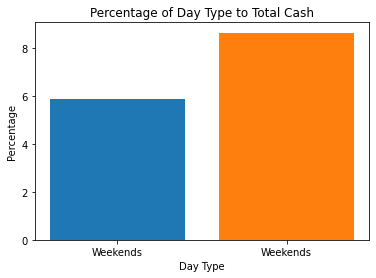

In [128]:
plt.bar(0, percentages[0])
plt.bar(1, percentages[1])
plt.xticks((0,1), ('Weekends','Weekends'))
plt.xlabel("Day Type")
plt.ylabel("Percentage")
plt.title("Percentage of Day Type to Total Cash")
plt.show()

In [129]:
# Percentages of total cash spent by customers
# during weekdays and weekends.
# 
percentages = []
for gen in list(df["type_market"].unique()):
    
    p = round((df["total"][df["type_market"]==gen].value_counts()
    /df["total"][df["type_market"]==gen].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(gen,"(% to exit) : ", p)

small (% to exit) :  90.0     9.23
60.0     7.69
55.0     4.62
130.0    3.85
100.0    3.85
         ... 
390.0    0.77
77.0     0.77
350.0    0.77
150.0    0.77
475.0    0.77
Name: total, Length: 64, dtype: float64
chain (% to exit) :  60.0     7.56
90.0     3.24
100.0    3.16
50.0     3.08
40.0     2.70
         ... 
982.0    0.08
562.0    0.08
419.0    0.08
417.0    0.08
347.0    0.08
Name: total, Length: 408, dtype: float64
median (% to exit) :  110.0     8.11
90.0      8.11
86.0      5.41
77.0      5.41
140.0     5.41
60.0      5.41
266.0     2.70
52.0      2.70
35.0      2.70
80.0      2.70
186.0     2.70
390.0     2.70
147.0     2.70
1273.0    2.70
30.0      2.70
177.0     2.70
320.0     2.70
10.0      2.70
95.0      2.70
47.0      2.70
130.0     2.70
84.0      2.70
285.0     2.70
102.0     2.70
25.0      2.70
44.0      2.70
78.0      2.70
260.0     2.70
7955.0    2.70
Name: total, dtype: float64


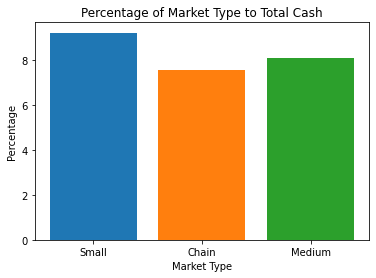

In [130]:
for i in range(len(percentages)):
    plt.bar(i, percentages[i])

plt.xticks((0,1,2), ('Small','Chain', 'Medium'))
plt.xlabel("Market Type")
plt.ylabel("Percentage")
plt.title("Percentage of Market Type to Total Cash")
plt.show()

In [131]:
# Percentages of total cash spent by customers
# during weekdays and weekends.
# 
percentages = []
for gen in list(df["loc_category"].unique()):
    
    p = round((df["total"][df["loc_category"]==gen].value_counts()
    /df["total"][df["loc_category"]==gen].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(gen,"(% to exit) : ", p)

mid (% to exit) :  60.0      7.68
90.0      3.95
100.0     3.23
50.0      3.01
40.0      2.65
          ... 
399.0     0.07
451.0     0.07
3440.0    0.07
1172.0    0.07
335.0     0.07
Name: total, Length: 400, dtype: float64
high (% to exit) :  60.0      4.35
90.0      2.90
99.0      2.90
150.0     2.90
530.0     2.90
          ... 
28.0      1.45
424.0     1.45
2657.0    1.45
160.0     1.45
7955.0    1.45
Name: total, Length: 61, dtype: float64
low (% to exit) :  161.0    100.0
Name: total, dtype: float64


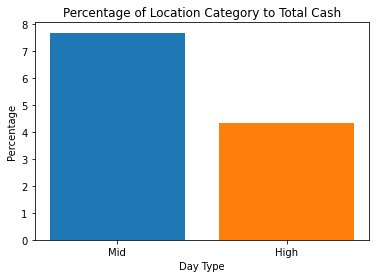

In [132]:
plt.bar(0, percentages[0])
plt.bar(1, percentages[1])
plt.xticks((0,1), ('Mid','High'))
plt.xlabel("Day Type")
plt.ylabel("Percentage")
plt.title("Percentage of Location Category to Total Cash")
plt.show()

In [133]:
df.columns

Index(['supermarket', 'no_of_items', 'variation', 'total', 'paid', 'change',
       'type', 'food', 'snack', 'beverage', 'consumables', 'high_end', 'asset',
       'fixed_asset', 'date', 'mall', 'time', 'time_type', 'type_market',
       'location', 'loc_category', 'day', 'day_type', '24hr', 'day.1', 'month',
       'year'],
      dtype='object')

In [134]:
df['month']

0       5
1       5
2       5
3       5
4       5
       ..
1459    6
1460    7
1461    6
1462    5
1463    6
Name: month, Length: 1464, dtype: int64

**bucketizing the Month column and using ‘groupby’ to create groups for each month group**

In [0]:
# Creating groups of months where each group consists of two months
#
month_bucket = df.groupby(pd.cut(df["month"],bins=[0,2,4,6,8,10,12]))

In [136]:
# Amount of cash spent every two months
#
month_bucket = round((month_bucket.sum()["total"] / month_bucket.size())*100 , 2)
month_bucket

month
(0, 2]      203428.57
(2, 4]      151175.00
(4, 6]       22266.01
(6, 8]       43301.73
(8, 10]      28538.46
(10, 12]    378000.00
dtype: float64

Text(0.5, 1.0, 'Percentage of people in different Month Groups that exited')

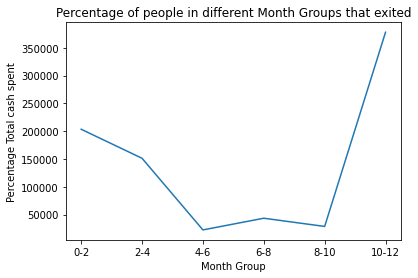

In [137]:
# Plotting the customer spending in groups of every two months.
#
x = [str(i)+"-"+str(i+2) for i in range(0,12,2)]
plt.plot(x,month_bucket.values)
plt.xlabel("Month Group")
plt.ylabel("Percentage Total cash spent")
plt.title("Percentage of people in different Month Groups that exited")

**We can clearly see that there is aspike in the amount of cash people spend during the end of the year.**

**Also from the month of April to the month of October poeple tend to spend less amount of cash**

> By the above analysis, it is clear that the month column is definitely relevant but in the form of buckets. So let's convert the continuous month column into buckets (categorical). 

> Bucketizing basically means aggregating/putting the values in the corresponding ranges.
For example, 7 belongs in the range 6-8, 11 belongs in the range 10-12 and so on.

***Now, let's replace the ‘Month’ column with the bucketized column***

In [138]:
df["month"] = pd.cut(df["month"],bins=[0,2,4,6,8,10,12])
df.head()

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year
0,acacia,1,1,90.0,100.0,10.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:33:00,night,small,saika,mid,saturday,weekend,no,20,"(4, 6]",2017.0
1,acacia,1,1,90.0,500.0,410.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12:00,night,small,saika,mid,saturday,weekend,no,20,"(4, 6]",2017.0
2,acacia,3,1,270.0,300.0,30.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:16:00,night,small,saika,mid,saturday,weekend,no,20,"(4, 6]",2017.0
3,acacia,3,1,137.0,200.0,63.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12:00,night,small,saika,mid,saturday,weekend,no,20,"(4, 6]",2017.0
4,acacia,1,1,75.0,80.0,5.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,18:31:00,afternoon,small,saika,mid,saturday,weekend,no,20,"(4, 6]",2017.0


### Geting Dummies

In [139]:
df.head(1)

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year
0,acacia,1,1,90.0,100.0,10.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:33:00,night,small,saika,mid,saturday,weekend,no,20,"(4, 6]",2017.0


In [140]:
df.columns

Index(['supermarket', 'no_of_items', 'variation', 'total', 'paid', 'change',
       'type', 'food', 'snack', 'beverage', 'consumables', 'high_end', 'asset',
       'fixed_asset', 'date', 'mall', 'time', 'time_type', 'type_market',
       'location', 'loc_category', 'day', 'day_type', '24hr', 'day.1', 'month',
       'year'],
      dtype='object')

In [141]:
df = pd.get_dummies(df)
df.head(1)

,no_of_items,variation,total,paid,change,year,supermarket_Eastmatt,supermarket_Naivas,supermarket_Selfridges,supermarket_Tuskys,supermarket_acacia,supermarket_chandarana,supermarket_cleanshelf,supermarket_eastmatt,supermarket_fairway,supermarket_foodplus,supermarket_interstrat,supermarket_kamindi,supermarket_karrymart,supermarket_kassmart,supermarket_large neema,supermarket_magna,supermarket_naivas,supermarket_nakumatt,supermarket_neema,supermarket_tumaini,supermarket_tuskys,supermarket_uchumi,supermarket_ukwala,supermarket_zucchini,type_card,type_cash,type_credit card,type_mpesa,type_points,type_redeemed points,type_voucher,food_no,food_yes,snack_no,...,24hr_yes,day.1_1,day.1_2,day.1_3,day.1_4,day.1_5,day.1_6,day.1_7,day.1_8,day.1_9,day.1_10,day.1_11,day.1_12,day.1_13,day.1_14,day.1_15,day.1_16,day.1_17,day.1_18,day.1_19,day.1_20,day.1_21,day.1_22,day.1_23,day.1_24,day.1_25,day.1_26,day.1_27,day.1_28,day.1_29,day.1_30,day.1_31,day.1_2305,day.1_17?06,"month_(0, 2]","month_(2, 4]","month_(4, 6]","month_(6, 8]","month_(8, 10]","month_(10, 12]"
0,1,1,90.0,100.0,10.0,2017.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


**Remove one column each from the created dummy variables to avoid ‘dummy variable trap**

In [142]:
df = df.drop(columns=["type_voucher","food_no",'snack_no', 'beverage_no', 'consumables_no',\
                      'high_end_no', 'asset_no','mall_no','fixed_asset_no', 'day.1_6'],axis=1)
df.head(3)

,no_of_items,variation,total,paid,change,year,supermarket_Eastmatt,supermarket_Naivas,supermarket_Selfridges,supermarket_Tuskys,supermarket_acacia,supermarket_chandarana,supermarket_cleanshelf,supermarket_eastmatt,supermarket_fairway,supermarket_foodplus,supermarket_interstrat,supermarket_kamindi,supermarket_karrymart,supermarket_kassmart,supermarket_large neema,supermarket_magna,supermarket_naivas,supermarket_nakumatt,supermarket_neema,supermarket_tumaini,supermarket_tuskys,supermarket_uchumi,supermarket_ukwala,supermarket_zucchini,type_card,type_cash,type_credit card,type_mpesa,type_points,type_redeemed points,food_yes,snack_yes,beverage_yes,consumables_yes,...,24hr_no,24hr_yes,day.1_1,day.1_2,day.1_3,day.1_4,day.1_5,day.1_7,day.1_8,day.1_9,day.1_10,day.1_11,day.1_12,day.1_13,day.1_14,day.1_15,day.1_16,day.1_17,day.1_18,day.1_19,day.1_20,day.1_21,day.1_22,day.1_23,day.1_24,day.1_25,day.1_26,day.1_27,day.1_28,day.1_29,day.1_30,day.1_31,day.1_2305,day.1_17?06,"month_(0, 2]","month_(2, 4]","month_(4, 6]","month_(6, 8]","month_(8, 10]","month_(10, 12]"
0,1,1,90.0,100.0,10.0,2017.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,1,90.0,500.0,410.0,2017.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,1,270.0,300.0,30.0,2017.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [143]:
df = df.iloc[:,:-1]
df.head()

,no_of_items,variation,total,paid,change,year,supermarket_Eastmatt,supermarket_Naivas,supermarket_Selfridges,supermarket_Tuskys,supermarket_acacia,supermarket_chandarana,supermarket_cleanshelf,supermarket_eastmatt,supermarket_fairway,supermarket_foodplus,supermarket_interstrat,supermarket_kamindi,supermarket_karrymart,supermarket_kassmart,supermarket_large neema,supermarket_magna,supermarket_naivas,supermarket_nakumatt,supermarket_neema,supermarket_tumaini,supermarket_tuskys,supermarket_uchumi,supermarket_ukwala,supermarket_zucchini,type_card,type_cash,type_credit card,type_mpesa,type_points,type_redeemed points,food_yes,snack_yes,beverage_yes,consumables_yes,...,day_type_weekend,24hr_no,24hr_yes,day.1_1,day.1_2,day.1_3,day.1_4,day.1_5,day.1_7,day.1_8,day.1_9,day.1_10,day.1_11,day.1_12,day.1_13,day.1_14,day.1_15,day.1_16,day.1_17,day.1_18,day.1_19,day.1_20,day.1_21,day.1_22,day.1_23,day.1_24,day.1_25,day.1_26,day.1_27,day.1_28,day.1_29,day.1_30,day.1_31,day.1_2305,day.1_17?06,"month_(0, 2]","month_(2, 4]","month_(4, 6]","month_(6, 8]","month_(8, 10]"
0,1,1,90.0,100.0,10.0,2017.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,90.0,500.0,410.0,2017.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,270.0,300.0,30.0,2017.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,1,137.0,200.0,63.0,2017.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,75.0,80.0,5.0,2017.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Modelling of Data

In [151]:
df.info()
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Columns: 969 entries, no_of_items to month_(8, 10]
dtypes: float64(4), int64(2), uint8(963)
memory usage: 1.4 MB


***Separate the features from the labels***

In [0]:
feat = df.drop(columns=['total'],axis=1)
label = df["total"]

***The first step to create any machine learning model is to split the data into ‘train’, ‘test’ and ‘validation’ sets. the validation set is optional but very important if you are planning to deploy the model.***

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size=0.3, random_state=10)



**To scale the data we will import ‘StandardScaler’ from sklearn**

In [0]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

# Machine Learning

> ## Support Vector Machine

In [0]:
from sklearn.svm import SVR

In [0]:
clf = SVR(kernel='rbf')
clf.fit(X_train,y_train)
y_pred_svc = clf.predict(X_test)

In [167]:
# MSE, RMSE, MAE
#
from sklearn import metrics
import math

print(f" Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred_svc)}")
print(f" Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred_svc)}")
print(f" Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_svc))}")

 Mean Absolute Error: 267.8385395753678
 Mean Squared Error: 1129179.0458308693
 Root Mean Squared Error: 1062.6283667542803


> ## Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rfc = rf.predict(X_test)

In [174]:
# MSE, RMSE, MAE
#
from sklearn import metrics
import math

print(f" Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred_rfc)}")
print(f" Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred_rfc)}")
print(f" Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfc))}")

 Mean Absolute Error: 74.36554191343964
 Mean Squared Error: 178735.9447281742
 Root Mean Squared Error: 422.7717406925091
